<h2>Web Scraping</h2>
Mengambil data dari web bisa dilakukan dengan dua cara, yaitu melalui API (yg bisa diakses publik) atau melalui scraping. Web scraping sendiri merupakan cara mengambil data-data melalui elemen-elemen HTML dari halaman web yang dapat diakses, baik melalui inspect element atau view-source.

<h2>BeautifulSoup (bs4)</h2>
web scraping dapat kita lakukan secara manual. Namun, dengan request url sederhana, komputer akan memberikan data HTML yang nampak membingungkan. Lihat contoh tampilannya di bawah ini.

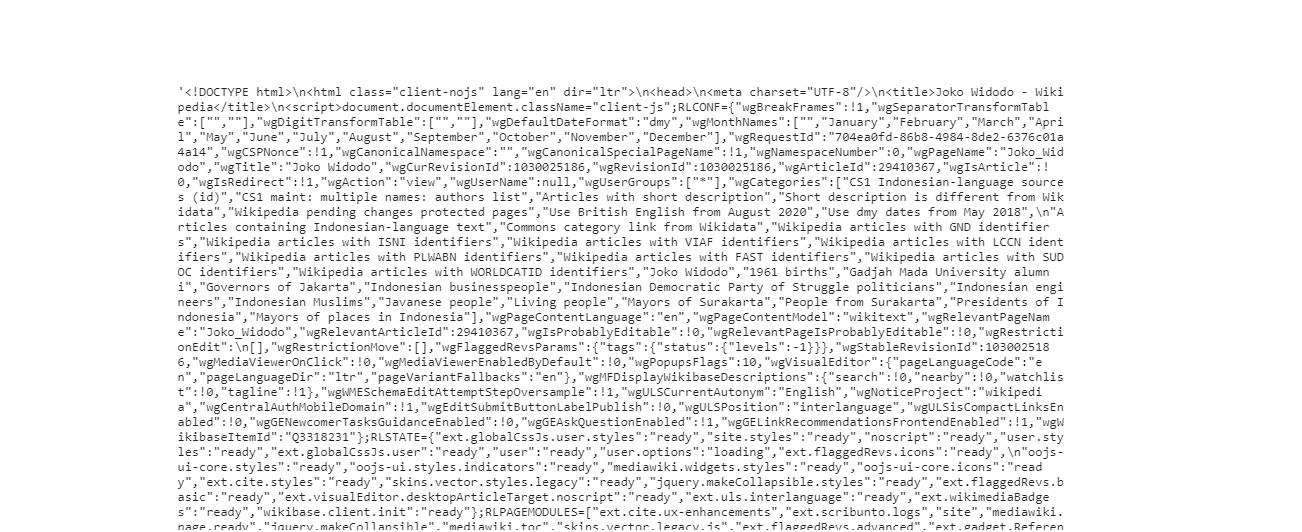

Untuk memudahkan scraping, kita bisa menggunakan BeautifulSoup. BeautifulSoup adalah library Python yang digunakan untuk mengambil data HTML dan XML. BeautifulSoup berfungsi sebagai parser untuk memisahkan komponen-komponen HTML menjadi rangkain elemen yang mudah dibaca.

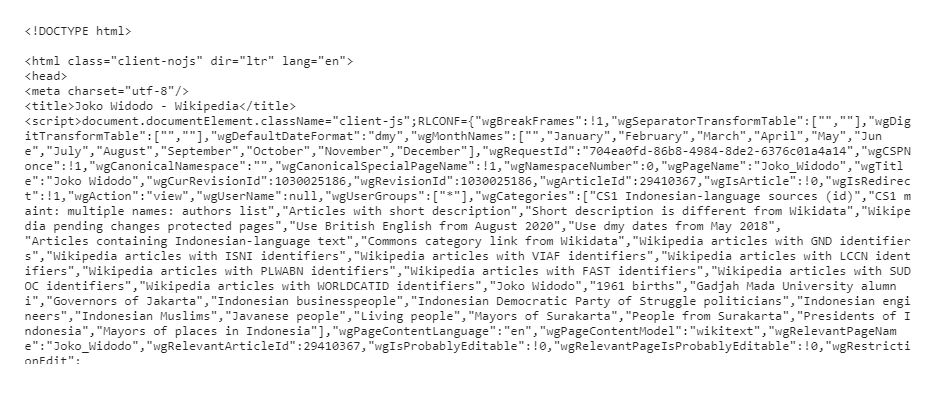

Masukkan nama kota
Malang
Searching in google......

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Malang cuaca - Google Search</title><script nonce="eCFfRBtUNd-kwjIiet6feA">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){window.google={kEI:'Tbx9Y_maFJetqtsP4Oa9-A8',kEXPI:'31',kBL:'dQwl'};google.sn='web';google.kHL='en';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="
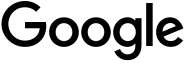
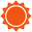
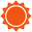
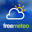

In [ ]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

def weather(city):
    city=city.replace(" ","+")
    res = requests.get(f'https://www.google.com/search?q={city}&oq={city}&aqs=chrome.0.35i39l2j0l4j46j69i60.6128j1j7&sourceid=chrome&ie=UTF-8',headers=headers)
    print("Searching in google......\n")
    soup = BeautifulSoup(res.text,'html.parser')   
    print (soup)

print("Masukkan nama kota")
city=input()
city=city+" cuaca"
weather(city)

In [ ]:
from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

def weather(city):
    city=city.replace(" ","+")
    res = requests.get(f'https://www.google.com/search?q={city}&oq={city}&aqs=chrome.0.35i39l2j0l4j46j69i60.6128j1j7&sourceid=chrome&ie=UTF-8',headers=headers)
    print("Searching in google......\n")
    soup = BeautifulSoup(res.text,'html.parser')   
    location = soup.select('#wob_loc')[0].getText().strip()      
    info = soup.select('#wob_dc')[0].getText().strip() 
    weather = soup.select('#wob_tm')[0].getText().strip()
    print(location)
    print(info)
    satuan = soup.select("span[aria-label*='°']")[0].getText().strip()
    if satuan=='°C':
      print(weather+"°C")
    else:
      celcius = (int(weather)-32)*5/9
      print("%.1f°C"%(celcius))

print("Masukkan nama kota")
city=input()
city=city+" cuaca"
weather(city)

Masukkan nama kota
bandung
Searching in google......

Bandung, Bandung City, West Java, Indonesia
Light rain showers
22.2°C
